**BGMI Victory Prediction Through Machine Learning Classification Algorithms**

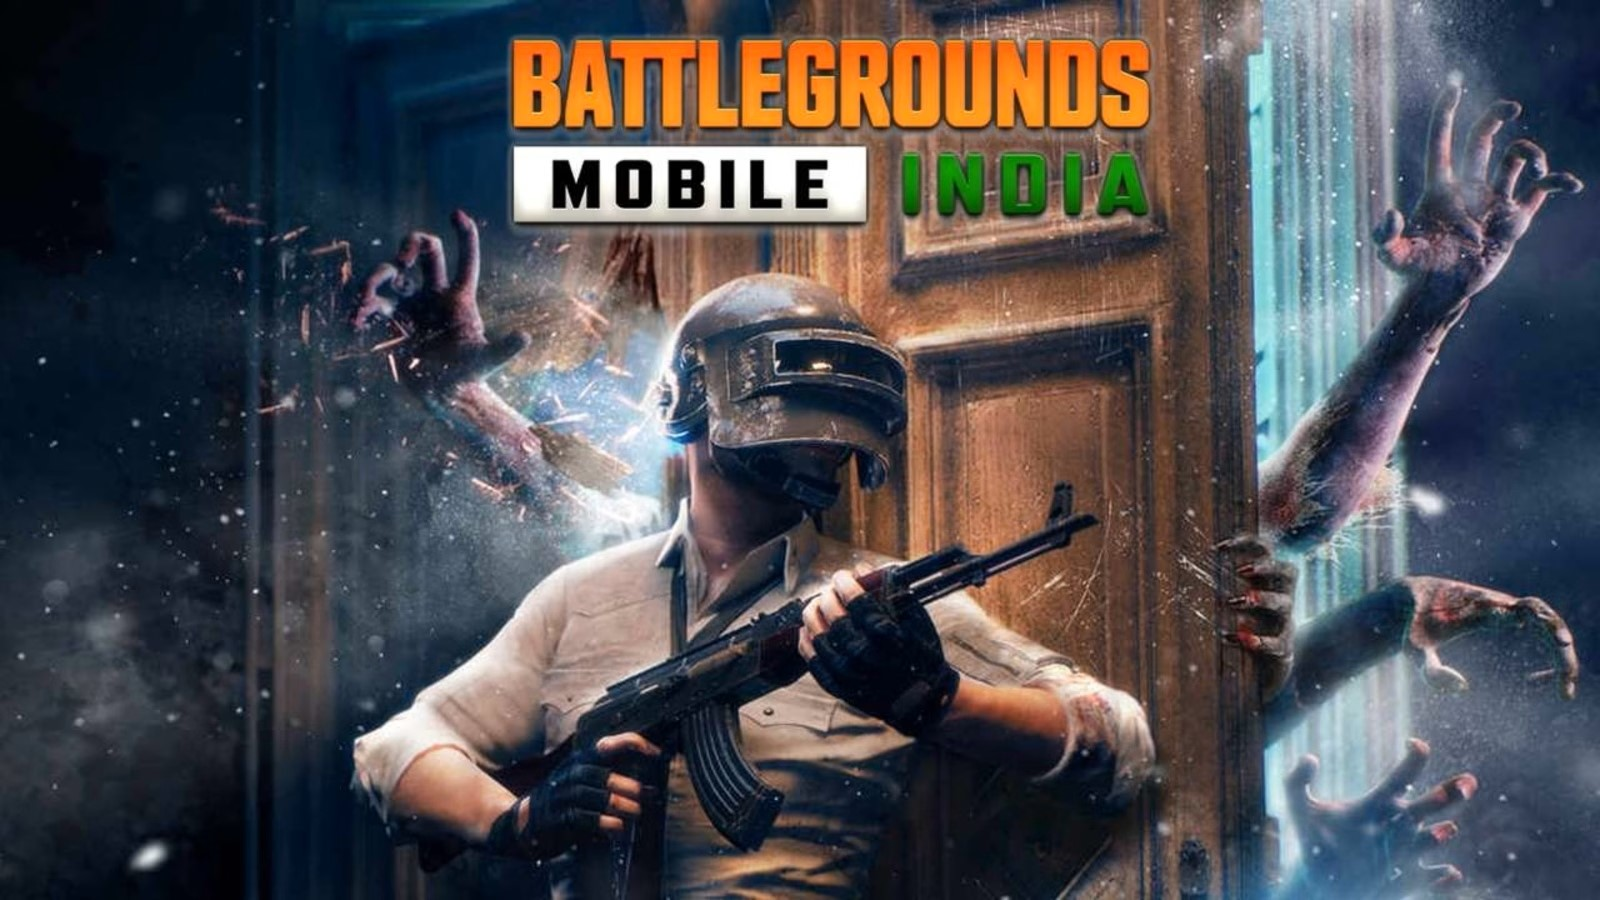

In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [26]:
#import  and load the dataset
data=pd.read_csv("/content/BGMI_GAME_DATASET.csv")
#Create a dataframe
df=pd.DataFrame(data)
#Display the top 5 rows
df.head()

,Id,Match_Id,Match_Type,Weapons_Acquired,Damage_Dealt,Kills,Assists,Heals,Revive,Ride_Distance,Walk_Distance,Swim_Distance,Team_Kills,Survival_Time,Match_Points,Match_Result
0,2926779827,821I29361T,Duo,6,0,0,0,7,4,175,2987,257,22,802,33,1
1,5128083743,B411B14432,Solo,3,1161,11,0,2,0,282,2055,350,13,794,30,1
2,3714616348,87B897E445,Squad,6,1372,13,0,7,2,2115,2952,348,27,659,22,0
3,4250287969,Z56652162H,Solo,4,105,1,0,8,0,1520,1087,146,10,1407,15,0
4,3617879477,4Y886V9874,Solo,7,1266,12,0,8,0,2912,189,32,13,640,28,0


**Description**
* **Id :** A unique ID given to each player in the dataset.
* **Match_Id :** A unique ID that represents a single match.
* **Match_Type :** The type of match played (e.g., Solo, Duo, Squad).
* **Weapons_Acquired :** Total number of weapons picked up by the player.
* **Damage_Dealt :** Total damage caused to enemies by the player.
* **Kills :** Number of enemies killed by the player.
* **Assists :** Number of kills the player helped teammates to achieve.
* **Heals :** Total number of healing items used by the player.
* **Revive :** Number of times the player revived teammates.
* **Ride_Distance :** Distance traveled using vehicles in meters.
* **Walk_Distance :** Distance traveled by walking or running in meters.
* **Swim_Distance :** Distance traveled by swimming in meters.
* **Team_Kills :** Total number of enemies killed by all team members in the     same team.
* **Survival_Time :** Total survival time of the player in the match (in seconds).
* **Match_Points :** Points scored in the match based on player performance.
* **Match_Result :** Final outcome of the match for the player (Victory or Defeat).


In [27]:
#Dimensions of dataframe
df.shape

(1000, 16)

In [28]:
#Details of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Match_Id          1000 non-null   object
 2   Match_Type        1000 non-null   object
 3   Weapons_Acquired  1000 non-null   int64 
 4   Damage_Dealt      1000 non-null   int64 
 5   Kills             1000 non-null   int64 
 6   Assists           1000 non-null   int64 
 7   Heals             1000 non-null   int64 
 8   Revive            1000 non-null   int64 
 9   Ride_Distance     1000 non-null   int64 
 10  Walk_Distance     1000 non-null   int64 
 11  Swim_Distance     1000 non-null   int64 
 12  Team_Kills        1000 non-null   int64 
 13  Survival_Time     1000 non-null   int64 
 14  Match_Points      1000 non-null   int64 
 15  Match_Result      1000 non-null   int64 
dtypes: int64(14), object(2)
memory usage: 125.1+ KB


In [29]:
#Count of missing values
df.isnull().sum()

,0
Id,0
Match_Id,0
Match_Type,0
Weapons_Acquired,0
Damage_Dealt,0
Kills,0
Assists,0
Heals,0
Revive,0
Ride_Distance,0


In [30]:
#Feature Engineering
df['Total_Distance'] = df['Ride_Distance'] + df['Walk_Distance'] + df['Swim_Distance']
df.head()

,Id,Match_Id,Match_Type,Weapons_Acquired,Damage_Dealt,Kills,Assists,Heals,Revive,Ride_Distance,Walk_Distance,Swim_Distance,Team_Kills,Survival_Time,Match_Points,Match_Result,Total_Distance
0,2926779827,821I29361T,Duo,6,0,0,0,7,4,175,2987,257,22,802,33,1,3419
1,5128083743,B411B14432,Solo,3,1161,11,0,2,0,282,2055,350,13,794,30,1,2687
2,3714616348,87B897E445,Squad,6,1372,13,0,7,2,2115,2952,348,27,659,22,0,5415
3,4250287969,Z56652162H,Solo,4,105,1,0,8,0,1520,1087,146,10,1407,15,0,2753
4,3617879477,4Y886V9874,Solo,7,1266,12,0,8,0,2912,189,32,13,640,28,0,3133


In [31]:
#Drop the unnecessary columns
data = df.drop(columns = ['Id','Match_Id','Match_Type','Ride_Distance','Walk_Distance','Swim_Distance'])
data.head()

,Weapons_Acquired,Damage_Dealt,Kills,Assists,Heals,Revive,Team_Kills,Survival_Time,Match_Points,Match_Result,Total_Distance
0,6,0,0,0,7,4,22,802,33,1,3419
1,3,1161,11,0,2,0,13,794,30,1,2687
2,6,1372,13,0,7,2,27,659,22,0,5415
3,4,105,1,0,8,0,10,1407,15,0,2753
4,7,1266,12,0,8,0,13,640,28,0,3133


In [32]:
#Split the data into train data and test data
X = data.drop(['Match_Result'], axis=1)
y = data['Match_Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Initialize the Randomforestclassifier
rfc_model=RandomForestClassifier(random_state=42)
#Train the model
rfc_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
#Predict on test set
y_pred=rfc_model.predict(X_test)

In [35]:
#Display classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.19      0.23        81
           1       0.57      0.72      0.63       119

    accuracy                           0.51       200
   macro avg       0.44      0.45      0.43       200
weighted avg       0.46      0.51      0.47       200



In [36]:
#Predictions using sample data
sample_data = pd.DataFrame({
    'Weapons_Acquired':[4],
    'Damage_Dealt':[1210],
    'Kills':[11],
    'Assists':[2],
    'Heals':[3],
    'Revive':[2],
    'Team_Kills':[16],
    'Survival_Time':[1680],
    'Match_Points': [20],
    'Total_Distance':[960]
})

In [37]:
sample_data = sample_data[X_train.columns]
prediction = rfc_model.predict(sample_data)

In [38]:
if prediction[0] == 1:
    print("Match Prediction: Win")
else:
    print("Match Prediction: Loss")

Match Prediction: Win
